In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest

df = pd.read_csv('../data/cleaned_olympiad_data.csv')

df

,Учебное заведение,Город,Год участия,Максимальный балл за все задания,Максимальный балл за теоретическое задание,Максимальный балл за практическое задание,Количество участников,Пол,Количество победителей,Количество призеров,...,Максимальный балл участника за практическое задание,Анализ информационных моделей,Поиск информации в реляционных базах данных,Кодирование и декодирование информации,Определение результатов работы алгоритмов,Работа с таблицами,Поиск символов в текстовом редакторе,Организация компьютерных сетей. Адресация,Программирование,Безопасность данных
0,Альметьевский медицинский колледж,Альметьевск,2022,100,30,40,2,м,0,0,...,32.98,7.99,5.69,9.55,6.10,4.92,8.12,6.48,8.35,8.25
1,Набережночелнинский строительный колледж,Набережные Челны,2020,60,40,50,3,ж,1,1,...,32.19,3.01,3.63,3.76,2.25,5.44,7.86,4.45,5.28,3.30
2,Казанский педагогический колледж,Казань,2018,80,50,50,4,м,4,4,...,27.32,5.89,2.84,8.35,2.62,5.75,9.69,2.10,6.63,7.85
3,Набережночелнинский машиностроительный техникум,Набережные Челны,2019,60,50,30,5,м,0,0,...,13.80,8.90,4.10,5.10,2.64,3.72,3.81,5.42,4.63,5.96
4,Набережночелнинский машиностроительный техникум,Набережные Челны,2024,60,30,50,4,м,3,3,...,36.85,2.01,6.29,9.24,9.87,6.89,2.13,9.24,6.71,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Чистопольский сельскохозяйственный техникум,Чистополь,2021,80,40,50,3,м,0,0,...,20.08,7.42,6.31,5.55,4.39,4.64,6.13,8.85,9.39,2.23
167,Казанский авиационно-технический колледж,Казань,2024,80,30,40,5,м,3,2,...,17.56,4.33,6.52,2.46,8.55,4.56,4.38,9.23,5.17,9.03
168,Чистопольский механический колледж,Чистополь,2019,80,40,40,2,м,1,0,...,36.09,8.61,2.15,5.13,2.45,5.23,9.22,6.89,8.83,4.36
169,Чистопольский сельскохозяйственный техникум,Чистополь,2019,80,30,50,3,ж,0,0,...,23.29,7.86,8.20,2.43,5.57,2.74,3.65,8.13,3.10,4.37


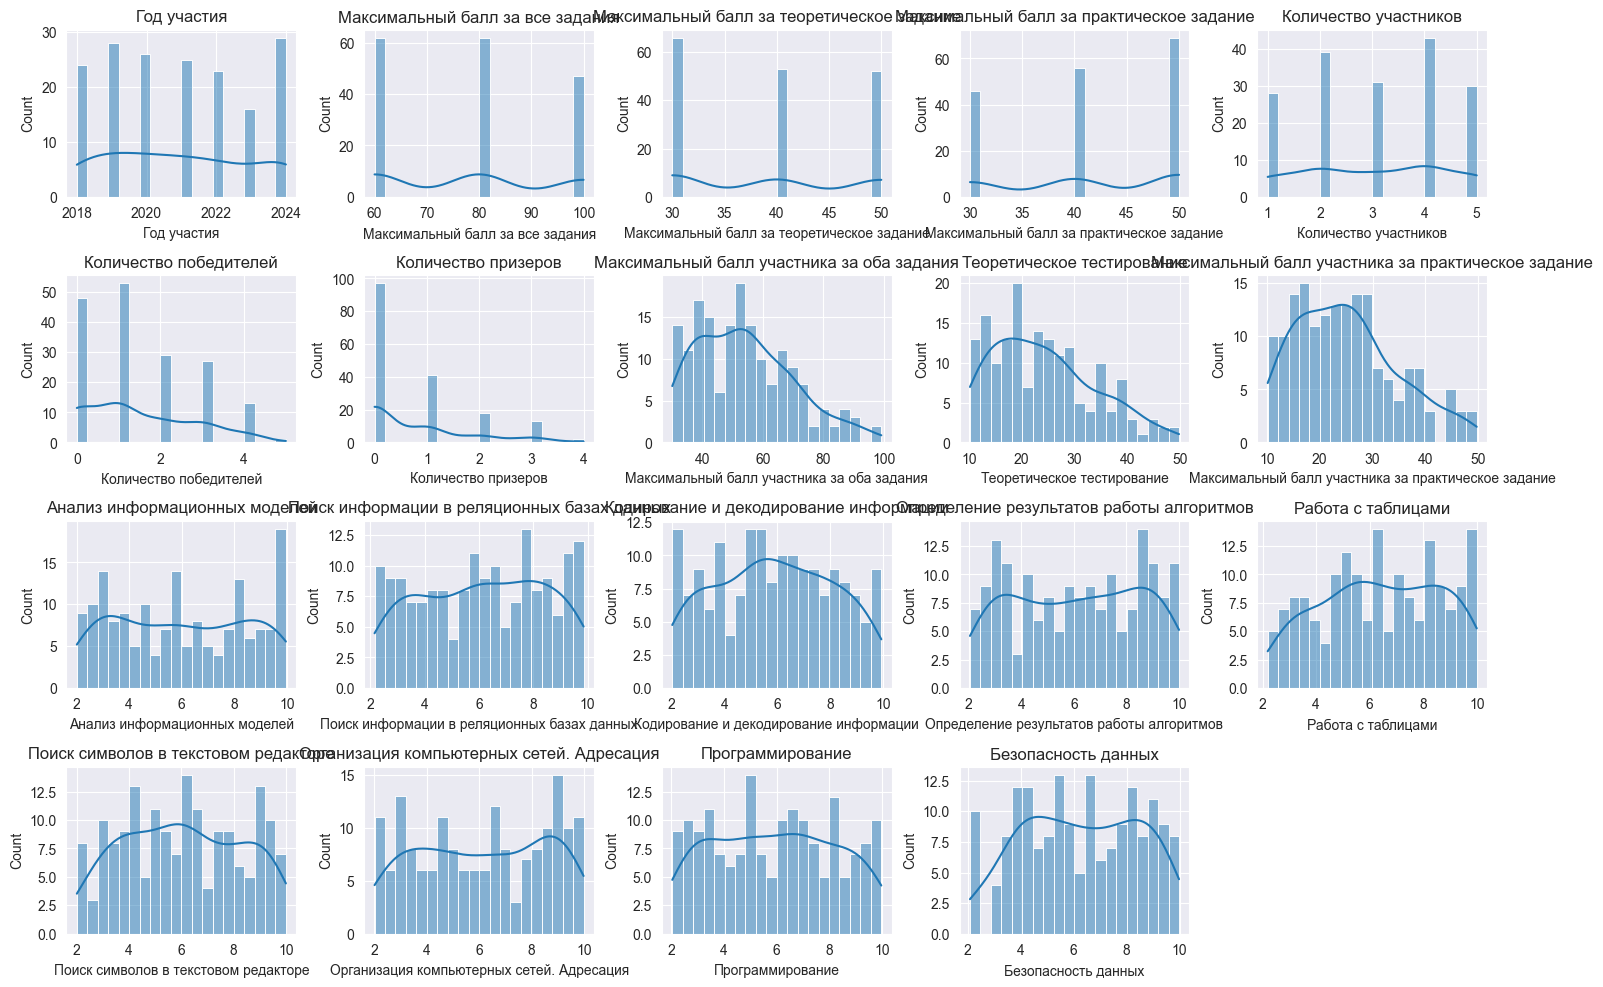

In [27]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [28]:
df.corr(numeric_only=True)['Количество участников'].sort_values(ascending=False)[1:6]

Количество победителей                       0.441345
Количество призеров                          0.284955
Теоретическое тестирование                   0.144550
Кодирование и декодирование информации       0.143224
Организация компьютерных сетей. Адресация    0.063579
Name: Количество участников, dtype: float64

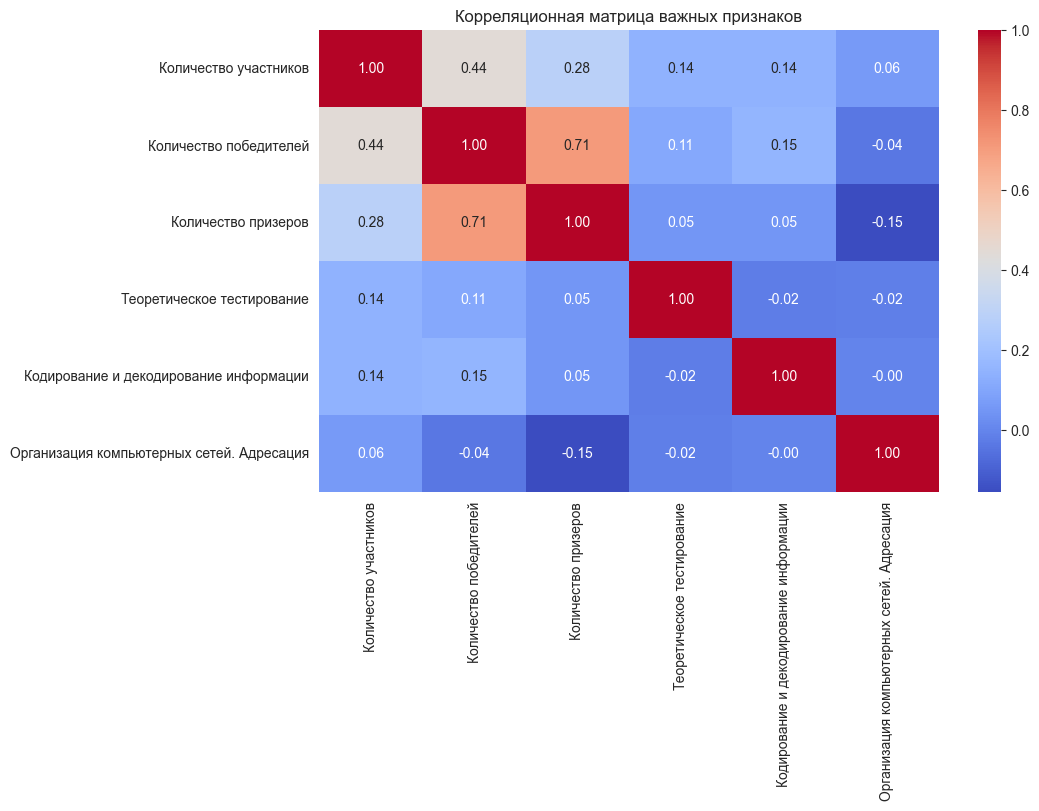

In [29]:
columns = [
    'Количество участников',
    'Количество победителей',
    'Количество призеров',
    'Теоретическое тестирование',
    'Кодирование и декодирование информации',
    'Организация компьютерных сетей. Адресация'
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Корреляционная матрица важных признаков")
plt.show()

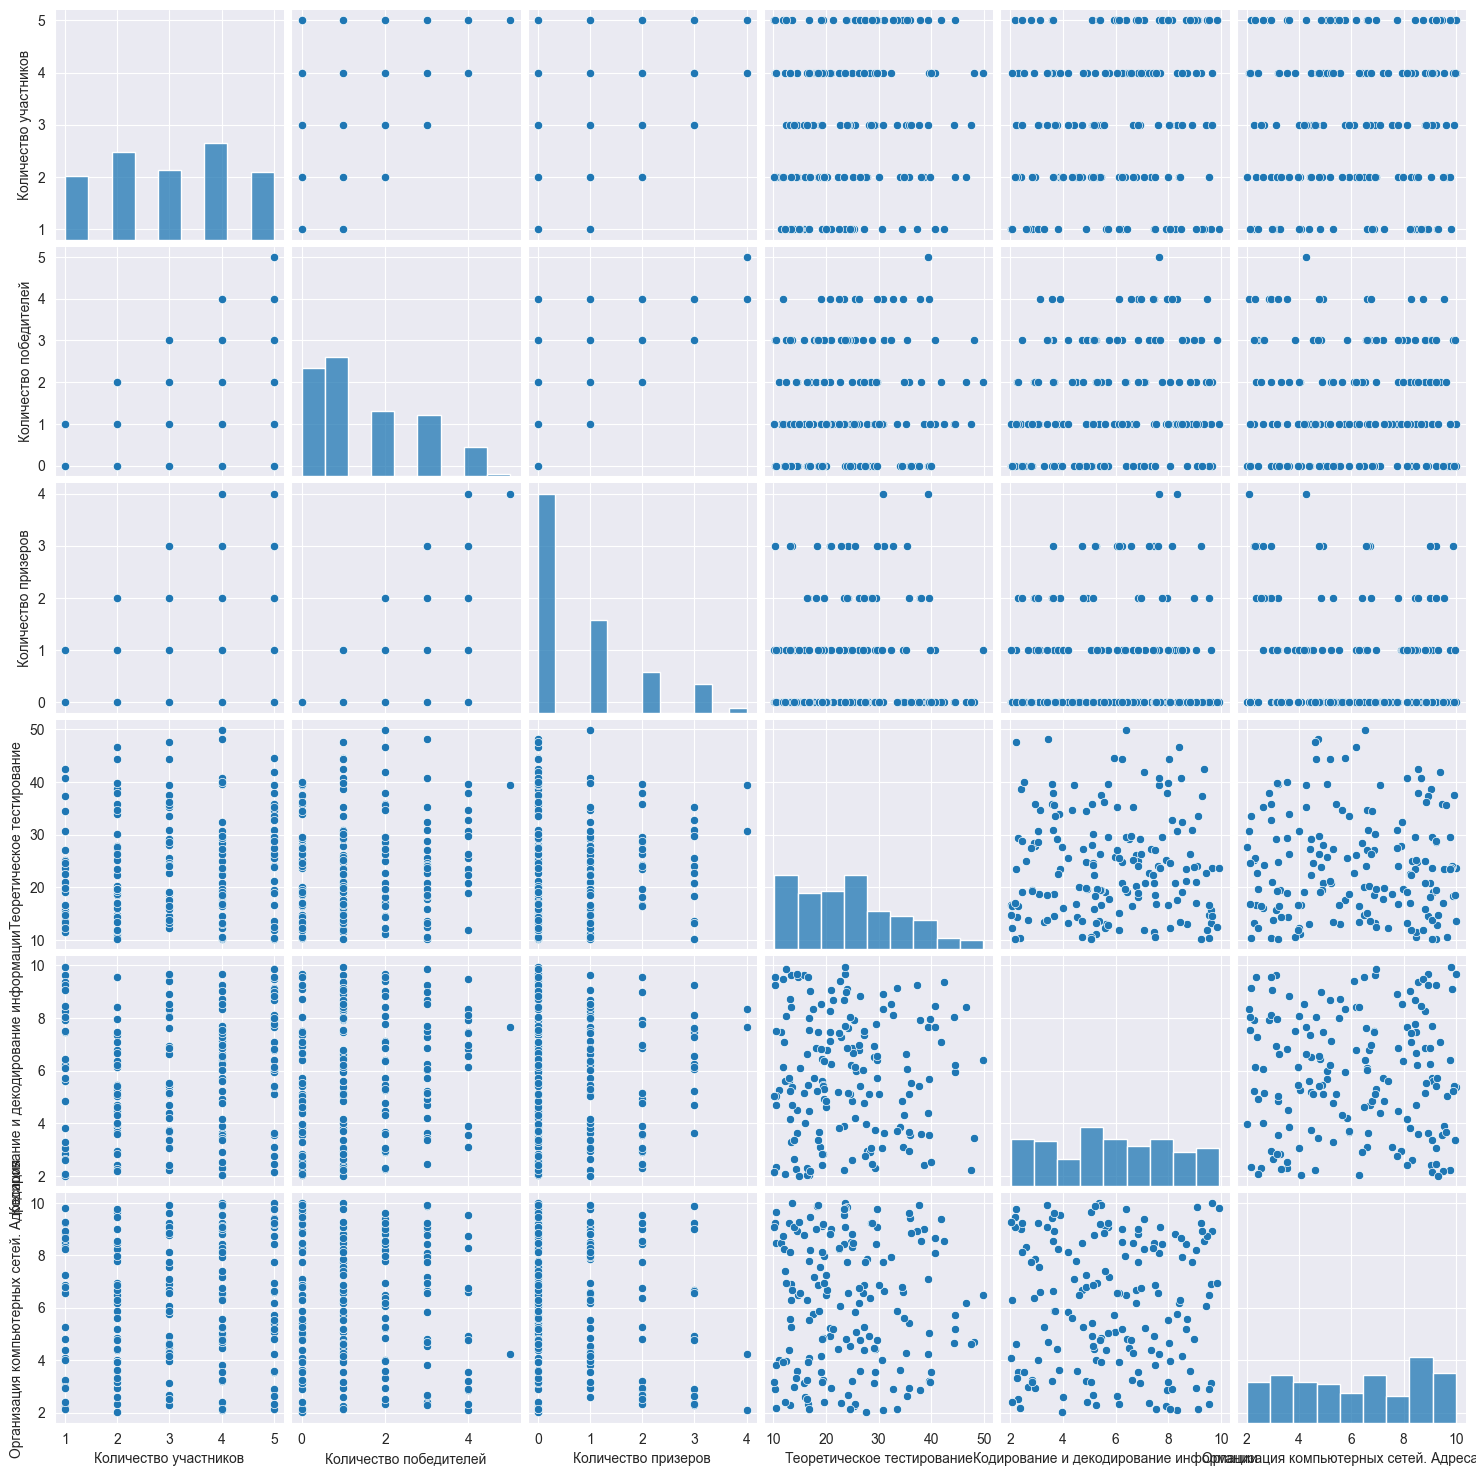

In [30]:
sns.pairplot(df[columns])
plt.show()

In [31]:
for col in columns:
    stat, p = shapiro(df[col])
    print(f"{col}: Stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(" ✅ Распределение похоже на нормальное (не отвергаем H0)")
    else:
        print(" ❌ Распределение НЕ нормальное (отвергаем H0)")
    print("-" * 50)

Количество участников: Stat=0.895, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Количество победителей: Stat=0.878, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Количество призеров: Stat=0.730, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Теоретическое тестирование: Stat=0.953, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Кодирование и декодирование информации: Stat=0.961, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Организация компьютерных сетей. Адресация: Stat=0.936, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------


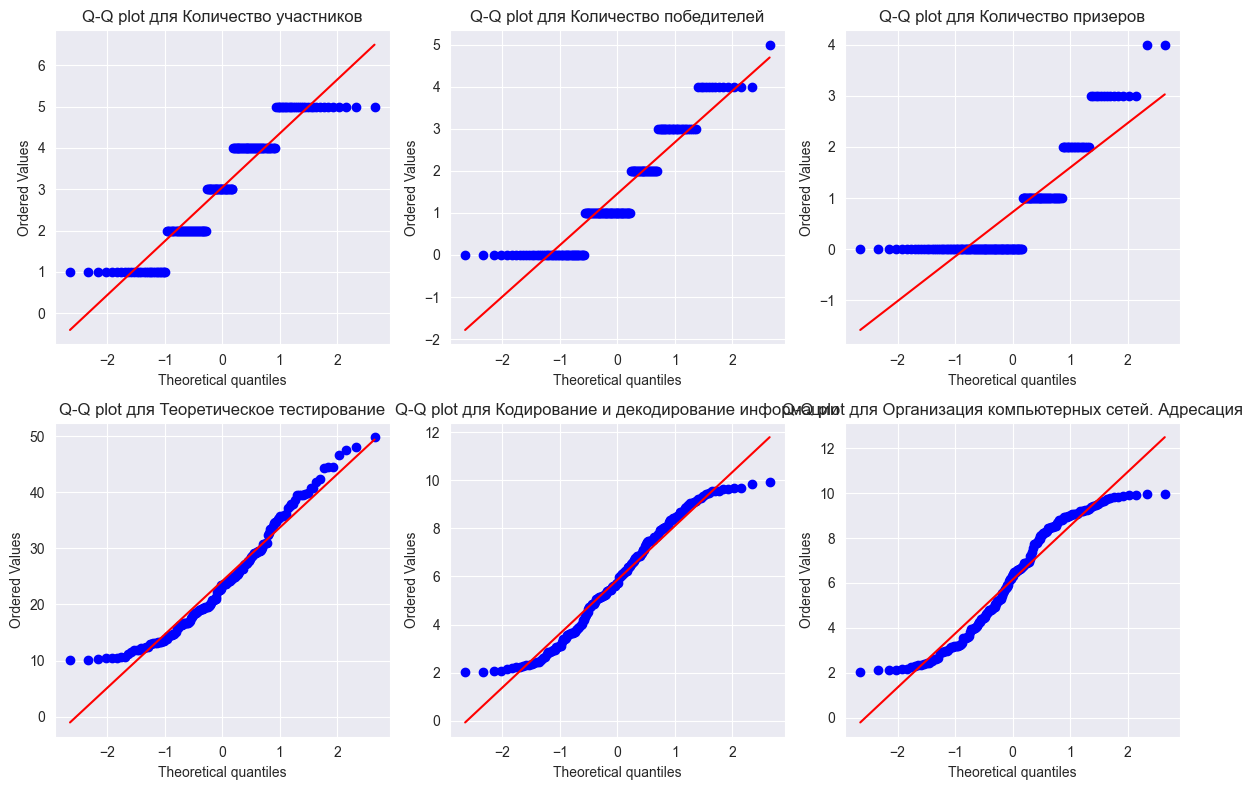

In [33]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot для {col}")

plt.tight_layout()
plt.show()

In [34]:
df.skew(numeric_only=True)

Год участия                                            0.130512
Максимальный балл за все задания                       0.158832
Максимальный балл за теоретическое задание             0.154518
Максимальный балл за практическое задание             -0.251541
Количество участников                                 -0.057090
Количество победителей                                 0.581779
Количество призеров                                    1.311706
Максимальный балл участника за оба задания             0.594099
Теоретическое тестирование                             0.579607
Максимальный балл участника за практическое задание    0.566962
Анализ информационных моделей                          0.036690
Поиск информации в реляционных базах данных           -0.079065
Кодирование и декодирование информации                 0.000179
Определение результатов работы алгоритмов             -0.052391
Работа с таблицами                                    -0.106981
Поиск символов в текстовом редакторе    

In [35]:
df.kurtosis(numeric_only=True)

Год участия                                           -1.235070
Максимальный балл за все задания                      -1.402256
Максимальный балл за теоретическое задание            -1.530043
Максимальный балл за практическое задание             -1.437306
Количество участников                                 -1.244679
Количество победителей                                -0.677632
Количество призеров                                    0.828493
Максимальный балл участника за оба задания            -0.200624
Теоретическое тестирование                            -0.447088
Максимальный балл участника за практическое задание   -0.344246
Анализ информационных моделей                         -1.356953
Поиск информации в реляционных базах данных           -1.204429
Кодирование и декодирование информации                -1.081827
Определение результатов работы алгоритмов             -1.316925
Работа с таблицами                                    -1.121522
Поиск символов в текстовом редакторе    

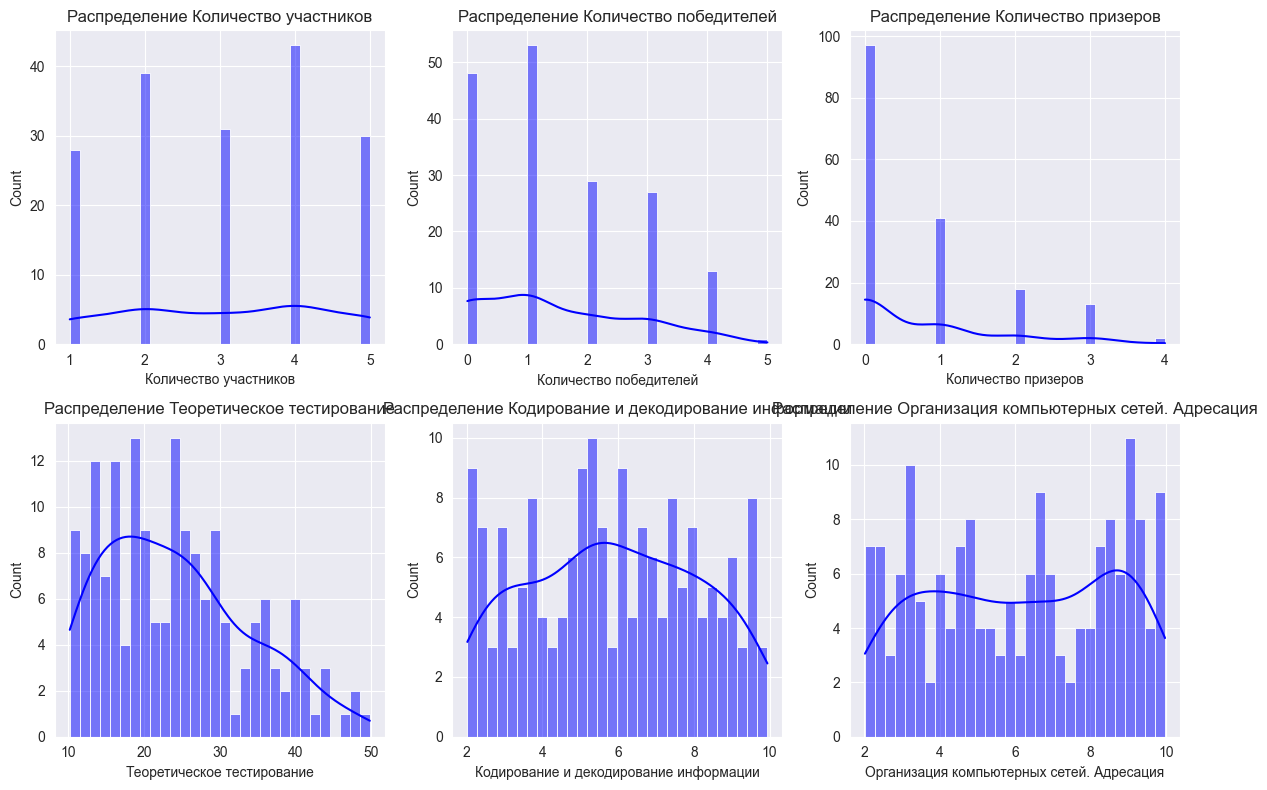

In [36]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Распределение {col}')

plt.tight_layout()
plt.show()